## Analysing Netflix data and doing Sentiment Analysis

#### It looks like there is something to the idea that movie lengths have decreased over the past ten years! But equipped only with our friend's aggregations, we're limited in the further explorations we can perform. There are a few questions about this trend that we are currently unable to answer, including:

<p>1.What does this trend look like over a longer period of time?<br>
   2.Is this explainable by something like the genre of entertainment?</p>
   
<p> Then we will be doing sentiment analysis on the whole data to see the overall sentiments</p>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob #for sentiment analysis 
%matplotlib inline
sns.set()


In [2]:
df = pd.read_csv("datasets/netflix_data.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,143,An architect and his wife move into a castle t...,Horror Movies


In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [4]:
#Count of every genre 
df.groupby(['genre']).size().reset_index(name='Counts')

,genre,Counts
0,Action,721
1,Anime Features,19
2,Anime Series,148
3,British TV,232
4,Children,502
5,Classic,21
6,Classic Movies,77
7,Comedies,1074
8,Crime TV,369
9,Cult Movies,12


### There were more movies released as compared to shows in all the years which indicates that shows became popular 

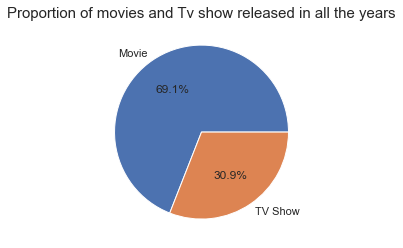

In [66]:
df_type=df.groupby('type').size().reset_index(name='Count')
plt.pie(df_type['Count'],autopct="%.1f%%",labels=df_type['type'])
plt.title('Proportion of movies and Tv show released in all the years',fontsize=15)
plt.show()

### Let's see the top 5 Actors and Directors

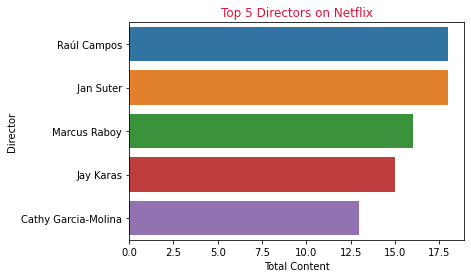

In [38]:
df['director']=df['director'].fillna('No Director Specified')
#filtered_directors=pd.DataFrame()
filtered_directors=df['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()#converts series to dataframe
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors['Director'] !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'],ascending= False)
sns.barplot(data=directorsTop5,x='Total Content',y='Director',orientation='horizontal')
plt.title('Top 5 Directors on Netflix',color='crimson')
plt.show()

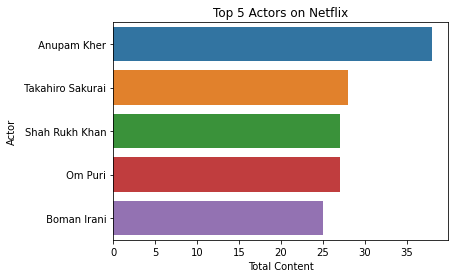

In [40]:
df['cast']=df['cast'].fillna('No Cast Specified')
filtered_cast=df['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'],ascending=False)
sns.barplot(data=actorsTop5,x='Total Content',y='Actor')
plt.title('Top 5 Actors on Netflix')
plt.show()

### Let's analyse the trend of production over the years

In [56]:
df1=df[['type','release_year']]
df1=df1.rename(columns={"type": "Type"})
df2=df1.groupby(['release_year','Type']).size().reset_index(name='Total Content')

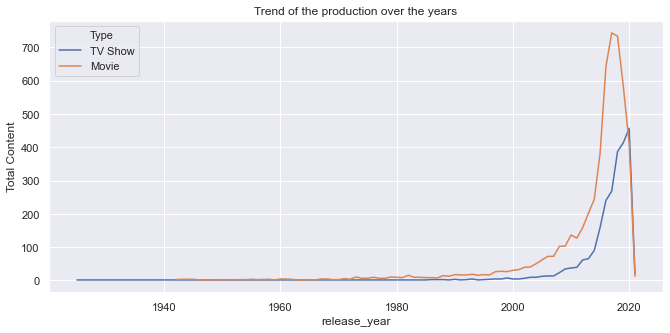

In [58]:
plt.figure(figsize =[11,5])
sns.lineplot(x='release_year',y='Total Content',data=df2,hue='Type')
plt.title('Trend of the production over the years')
plt.legend()
plt.show()

#### It started becoming popular after 2000 and saw a sudden rise in years near 2020

## Now we will filter the data for the type movies and analyse it

In [61]:
df_movies= df[df['type']=='Movie']
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


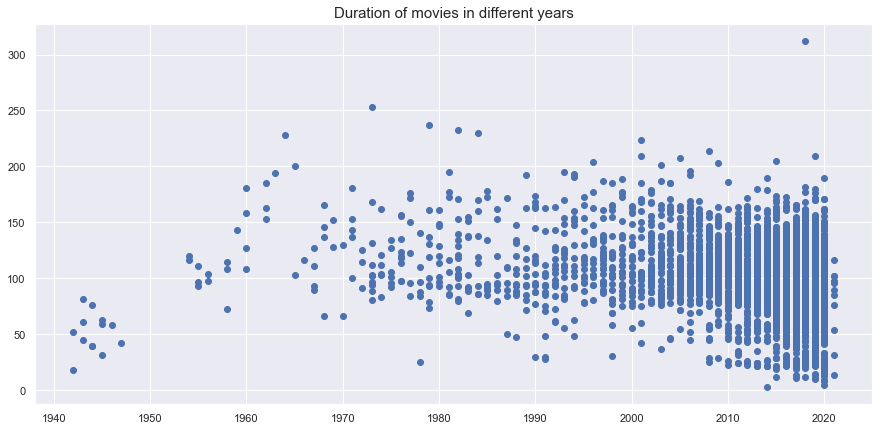

In [70]:
plt.figure(figsize=[15,7])
plt.scatter(df_movies['release_year'],df_movies['duration'])
plt.title('Duration of movies in different years',fontsize=15)
plt.show()


 Many movies were presented on Netflix in the last two decades, many short movies have been released too so we will filter the movies with duration less than 60 minutes and lets have a look at their genre


In [73]:
short_movies = df_movies[df_movies['duration']<60]
short_movies['genre'].tail(10)

7569    Documentaries
7603         Stand-Up
7604         Stand-Up
7613    Documentaries
7671    Uncategorized
7679    Documentaries
7692    Documentaries
7718         Stand-Up
7771    Documentaries
7784    Documentaries
Name: genre, dtype: object

It seems like  Documentaries, Stand-Up and Children are the genre with less duration than blockbuster movies. Now let's plot these movies

In [74]:
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in df_movies.iterrows() :
    if row['genre']=='Children' :
        colors.append('red')
    elif row['genre']=='Stand-Up' :
        colors.append('blue')
    elif row['genre']=='Documentaries' :
        colors.append('green')
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list        
colors[0:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'green']

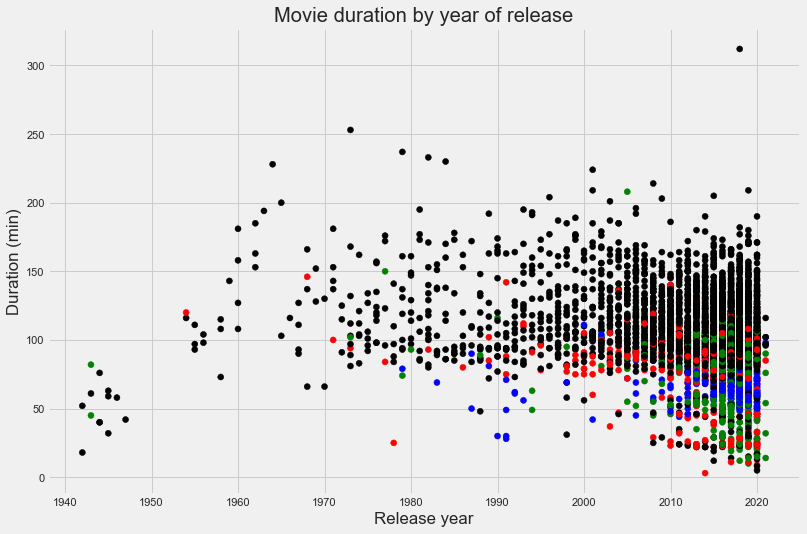

In [75]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
plt.scatter(df_movies["release_year"], df_movies["duration"], c=colors)
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()

## We have analysed the Netflix data so far. Now we will be doing Sentiment Analysis on this and try to get the sentiment on the basis of description

In [81]:
dfx=df[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]


In [84]:
import plotly.express as px # importing plotly for plotting
fig = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig.show()#interactive plot
